Ode Solver <br>
Simulation 447 <br>
By Grant Smith and Leo Petersen <br>

Ode Solver

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math

dt = 0.1  # Let some dt value be pretty low

def Euler(dt, f, t, y, *args):
    return y + f(t,y,args) * dt

def solve_ode(f, tspan, y0, method = Euler, *args, **options):

    y = [ y0[0] ] # Vector with initial position
    t = [ tspan[0] ] # Vector with initial time

    while t[-1] < tspan[1]:
        solved_value = method(dt, f, t[-1], y[-1], args) # Run some method given some function, f
        y.append(solved_value)
        t.append(t[-1] + dt)

    y = np.array(y) # Convert to numpy arrays at the end for speed
    t = np.array(t)
    return t, y

Simple Gravity

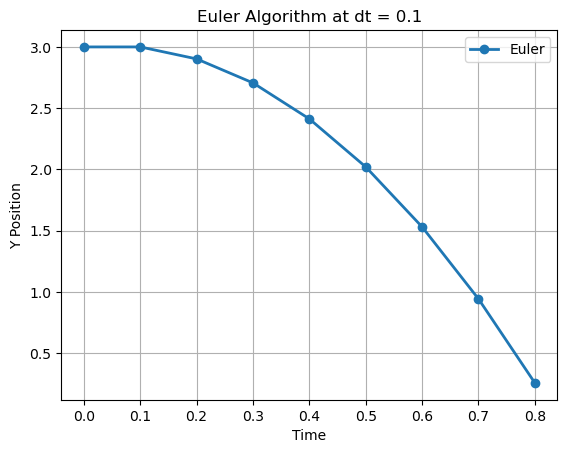

In [33]:
def simple_gravity(t, y, g):
    return -g[0][0]*t

g0 = 9.8 # Given bounds 
y0 = [3, 0]
t0 = [0, math.sqrt(6/g0)]
t, y = solve_ode(simple_gravity, t0, y0, Euler, g0) # Run the solver

# Plotting
plt.plot(t, y, 'o-', linewidth=2, label="Euler")
plt.grid(True)
plt.title("Euler Algorithm at dt = " + str(dt))
plt.ylabel('Y Position')
plt.xlabel('Time')
plt.legend()
plt.show()

Euler Cromer

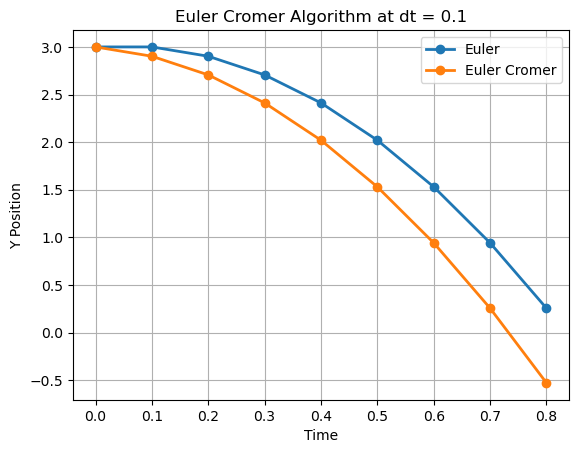

In [31]:
def Euler_Cromer(dt, f, t, y, *args):
    y_end = y + f(t, y, args) * dt # Calculate a y_end
    return y + f(t + dt, y_end, args) * dt

t, y = solve_ode(simple_gravity, t0, y0, Euler, g0)
plt.plot(t, y, 'o-', linewidth=2, label="Euler")

t, y = solve_ode(simple_gravity, t0, y0, Euler_Cromer, g0)
plt.plot(t, y, 'o-', linewidth=2, label="Euler Cromer")

plt.grid(True)
plt.title("Euler Cromer Algorithm at dt = " + str(dt))
plt.ylabel('Y Position')
plt.xlabel('Time')
plt.legend()
plt.show()

Euler Richardson

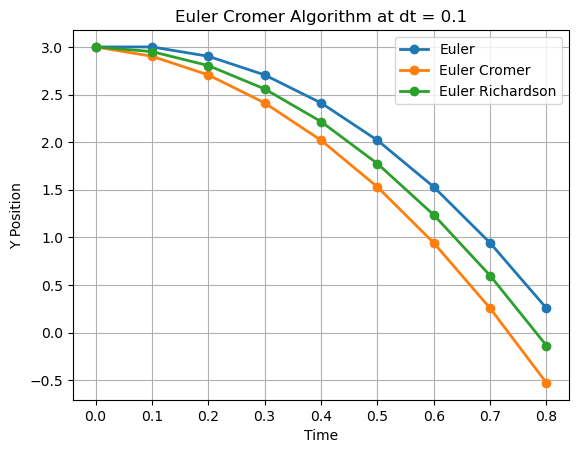

In [32]:
def Euler_Richardson(dt, f, t, y, *args):
    y_mid = y + f(t, y, args)*(dt/2) # Calculate y mid
    return y + f(t + dt/2, y_mid, args) * dt

t, y = solve_ode(simple_gravity, t0, y0, Euler, g0)
plt.plot(t, y, 'o-', linewidth=2, label="Euler")

t, y = solve_ode(simple_gravity, t0, y0, Euler_Cromer, g0)
plt.plot(t, y, 'o-', linewidth=2, label="Euler Cromer")

t, y = solve_ode(simple_gravity, t0, y0, Euler_Richardson, g0)
plt.plot(t, y, 'o-', linewidth=2, label="Euler Richardson")

plt.grid(True)
plt.title("Euler Cromer Algorithm at dt = " + str(dt))
plt.ylabel('Y Position')
plt.xlabel('Time')
plt.legend()
plt.show()